In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#repare data, split it into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:

#ClassificationModels: Importing classification models from scikit-learn library

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score

In [23]:
#DataLoading: Loading dataset from CSV file

data = pd.read_csv(r"C:\Users\Catherine\Downloads\bank - bank (1).csv")




In [24]:
#DataPreview

data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
#DataSummary

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
#MissingData

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [27]:
#CorrelationMatrix

data.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


##Exploratory Analysis
#Age Range
#Age Range of Customers

print('Max. Age:', df_no_outlier['age'].max())
print('Min. Age:', df_no_outlier['age'].min())


In [29]:
# Age Range of Customers
print('Max Age:', data['age'].max())
print('Min Age:', data['age'].min())



Max Age: 95
Min Age: 18


In [43]:
#Age bracket categorization function

def age_bracket(age):
    if age <= 30:
        return 'Youth'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Elder'




In [44]:
#Applying age_bracket function to create age_bracket column

data['age_bracket'] = data['age'].apply(age_bracket)


In [45]:
from IPython.display import display

data['age_bracket'] = data['age'].apply(age_bracket)
age_bracket_df = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
                       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit', 'age_bracket']].copy()

display(age_bracket_df)




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_bracket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Elder
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Adult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Elder
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Elder
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Elder
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Elder


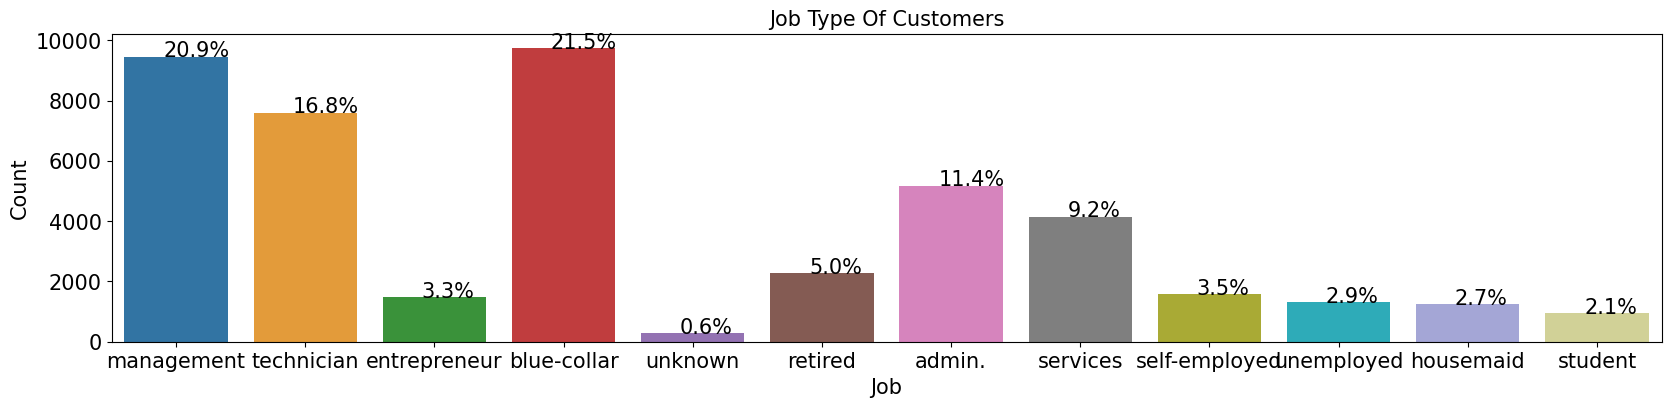

In [60]:
# DataVisualization of Job types

plt.figure(figsize=(20, 4))
ax = sns.countplot(x=data['job'], data=data, palette=colors)
plt.xticks(size=15)
plt.xlabel('Job', size=15)
plt.yticks(size=15)
plt.ylabel('Count', size=15)
plt.title('Job Type Of Customers', size=15)

# Calculate percentages
total = float(len(data['job']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()



Observation: 
The chart above provides insights into the distribution of customers based on their job types. It showcases the count of customers belonging to different job categories. From the chart, it can be observed that the most common job category among customers is "blue-collar," followed by "management" and "technician." This information can be valuable for understanding the customer base and tailoring marketing strategies based on their occupations.

In [62]:
# Compute cross-tabulation with percentage representation
cross_tab_job = pd.crosstab(index=data['job'], columns=data['default'], normalize='index')
cross_tab_job



default,no,yes
job,,
admin.,0.985689,0.014311
blue-collar,0.979346,0.020654
entrepreneur,0.963013,0.036987
housemaid,0.982258,0.017742
management,0.982660,0.017340
retired,0.988516,0.011484
self-employed,0.979101,0.020899
services,0.981945,0.018055
student,0.996802,0.003198


In [66]:


# Compute cross-tabulation with count representation
cross_job = pd.crosstab(index=data['job'], columns=data['default'])
cross_job



default,no,yes
job,,
admin.,5097,74
blue-collar,9531,201
entrepreneur,1432,55
housemaid,1218,22
management,9294,164
retired,2238,26
self-employed,1546,33
services,4079,75
student,935,3


In [70]:
# Analyzing job types that defaulted

df_defaulted_jobs = data[data['default'] != 'no']

print(df_defaulted_jobs.head(30))


      age           job   marital  education default  balance housing loan  \
7      42  entrepreneur  divorced   tertiary     yes        2     yes   no   
79     55      services  divorced  secondary     yes        1     yes   no   
338    51        admin.    single  secondary     yes       -2      no   no   
419    33    technician   married  secondary     yes       72     yes   no   
458    33   blue-collar    single  secondary     yes      -60      no   no   
508    60       retired   married  secondary     yes       15      no   no   
562    35  entrepreneur   married  secondary     yes      204     yes   no   
572    41   blue-collar    single    primary     yes     -137     yes  yes   
596    54      services   married  secondary     yes        0     yes   no   
636    52   blue-collar  divorced    primary     yes     -183     yes   no   
689    40   blue-collar   married    primary     yes        0     yes   no   
767    46    technician   married  secondary     yes      289   

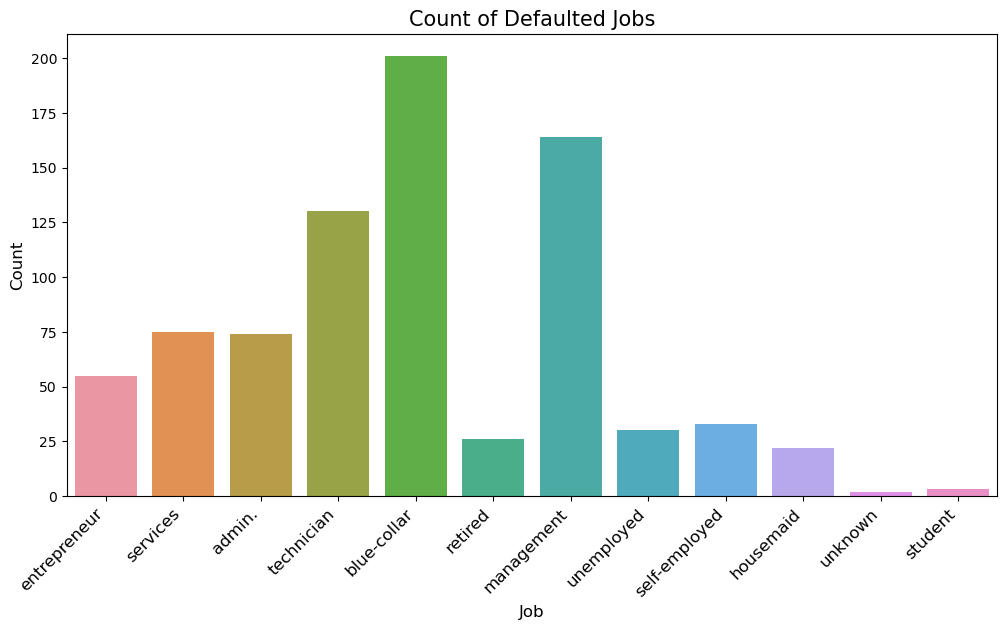

In [72]:
# Analyzing  job types that defaulted
df_defaulted_jobs = data[data['default'] != 'no']

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='job', data=df_defaulted_jobs)
plt.xticks(rotation=45, ha='right', size=12)
plt.xlabel('Job', size=12)
plt.ylabel('Count', size=12)
plt.title('Count of Defaulted Jobs', size=15)
plt.show()



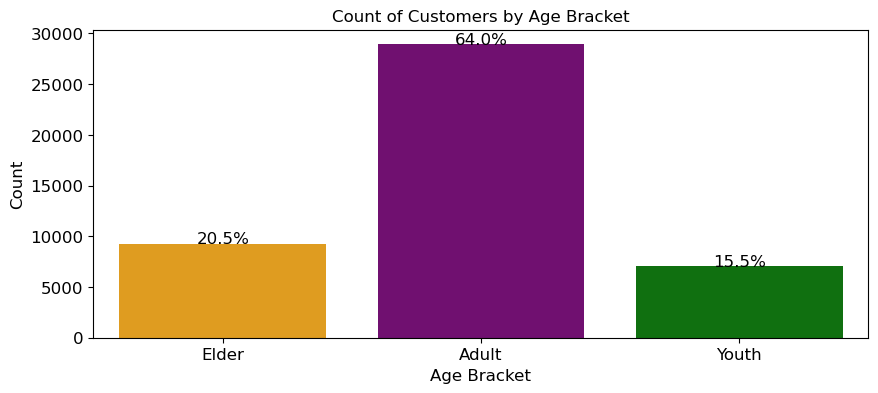

In [46]:
# Analyzing the age bracket

plt.figure(figsize=(10, 4))
ax = sns.countplot(x=data['age_bracket'], data=data, palette=colors)
plt.xticks(size=12)
plt.xlabel('Age Bracket', size=12)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Count of Customers by Age Bracket', size=12)

# Calculate percentages
total = float(len(data['age_bracket']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()



Observation:
The chart reveals that the bank's customer base is mainly concentrated in the 'Adult' age range, representing 64.0% of the total customers, followed by the 'Elder' age range at 20.5%, while the 'Youth' age range constitutes 15.5% of the customers, suggesting the bank's focus on the adult demographic for its services and marketing efforts.

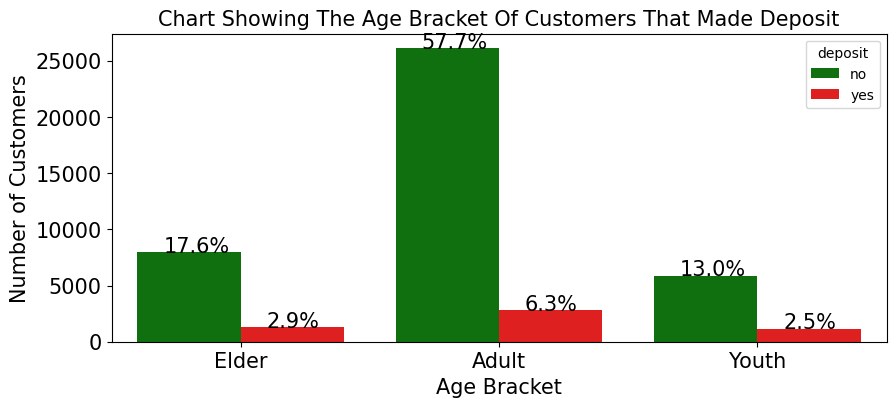

In [52]:
#DataVisualization #AgeBracket #DepositDistribution #CustomerAnalysis


plt.figure(figsize=(10, 4))
ax = sns.countplot(x=data['age_bracket'], hue='deposit', data=data,
                   palette=['green', 'red'])
plt.xticks(size=15)
plt.xlabel('Age Bracket', size=15)
plt.yticks(size=15)
plt.ylabel('Number of Customers', size=15)
plt.title('Chart Showing The Age Bracket Of Customers That Made Deposit', size=15)

# Calculate percentages
total = float(len(data['age_bracket']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)

plt.show()







Observation:
The chart above reveals the deposit distribution across different age brackets. Among the customers in the 'Elder' age bracket, 17.6% made a deposit, while 2.9% did not. For the 'Adult' age bracket, 57.7% made a deposit, and 6.6% did not. In the 'Youth' age bracket, 13.0% made a deposit, and 2.5% did not. This indicates that a higher proportion of customers in the 'Adult' age bracket made a deposit, followed by the 'Youth' age bracket, while the 'Elder' age bracket also demonstrated a significant deposit rate.

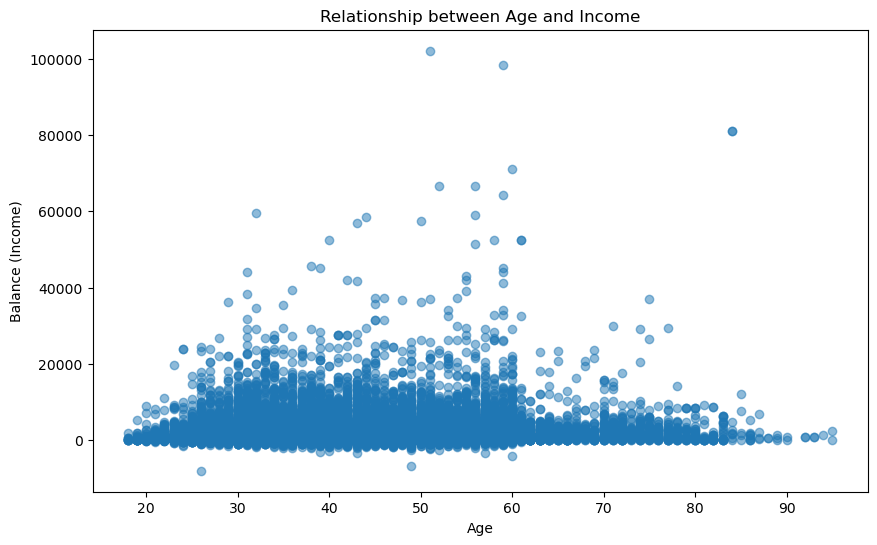

In [74]:
# Relationship between Age and income
age = data['age']
balance = data['balance']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age, balance, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Balance (Income)')
plt.title('Relationship between Age and Income')
plt.show()



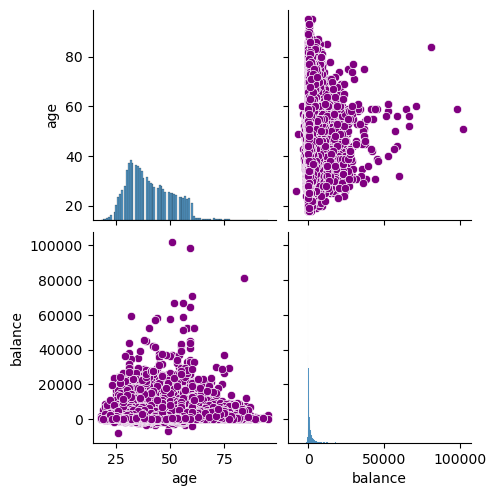

In [94]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant columns
age = data['age']
balance = data['balance']
income = data['poutcome']

# Combine the columns into a new DataFrame
df_pair = pd.concat([age, income, balance], axis=1)

# Create the pair plot with purple color
sns.pairplot(df_pair, plot_kws={'color': 'purple'})

# Display the plot
plt.show()


C:\Users\Catherine\AppData\Local\Temp\ipykernel_11772\2424864462.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_correlation.corr()


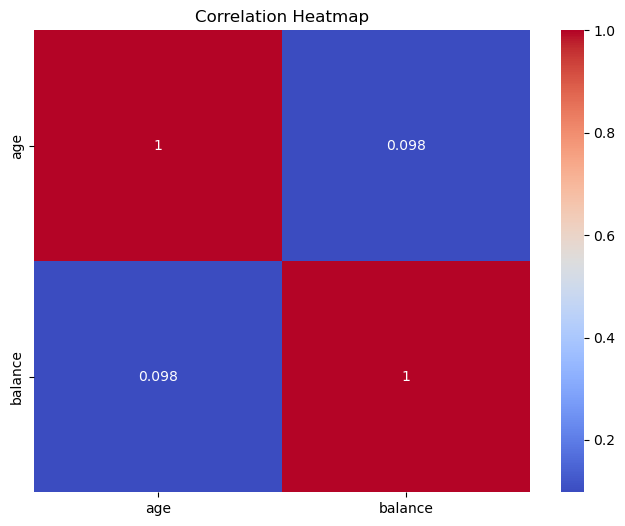

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the relevant columns
age = data['age']
balance = data['balance']
income = data['poutcome']


# Combine the columns into a new DataFrame
df_correlation = pd.concat([age, income, balance], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_correlation.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()


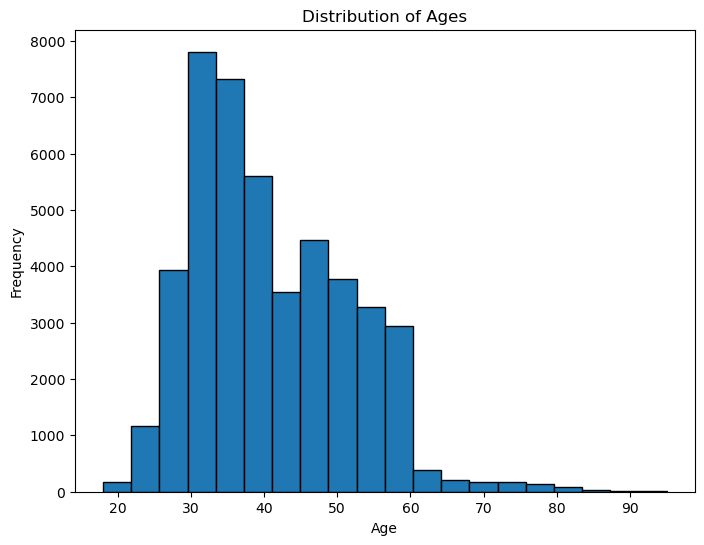

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the 'age' column
ages = data['age']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(ages, bins=20, edgecolor='black')

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

# Display the plot
plt.show()




In [103]:
import pandas as pd

# Assuming you have the age, balance, and income variables
age = [58, 44, 35, 29, 41]
balance = [2143, 29, 245, 2, 0]
income = [50000, 60000, 40000, 55000, 30000]

# Create the DataFrame
data = pd.DataFrame({'age': age, 'balance': balance, 'income': income})

# Print the DataFrame
print(data)


   age  balance  income
0   58     2143   50000
1   44       29   60000
2   35      245   40000
3   29        2   55000
4   41        0   30000


In [109]:
print(data.columns)



Index(['age', 'balance', 'income'], dtype='object')


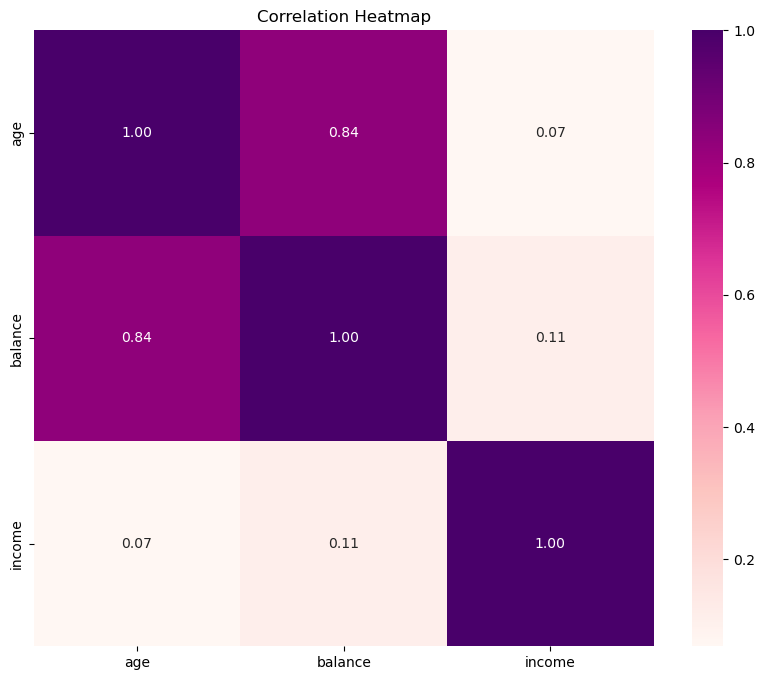

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset DataFrame with numerical columns
df_subset = data[['age', 'balance', 'income']]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Create a heatmap with shades of red and purple
plt.figure(figsize=(10, 8))
hm = sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

